In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('train_set_diabetes.csv',index_col=0)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,High_BloodPressure,Wieght,Elderly,Glucose_Level,Thickness_level
118,4,97,60,23,125.0,28.2,0.443,22,0,0,Healthy,0,normal_glucose_levels,3
336,0,117,0,32,125.0,33.8,0.932,44,0,0,Obese,0,normal_glucose_levels,4
374,2,122,52,43,158.0,36.2,0.816,28,0,0,Obese,0,normal_glucose_levels,5
518,13,76,60,32,125.0,32.8,0.180,41,0,0,Obese,0,normal_glucose_levels,4
716,3,173,78,39,185.0,33.8,0.970,31,1,0,Obese,0,high_glucose_levels,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,3,182,74,32,125.0,30.5,0.345,29,1,0,Obese,0,high_glucose_levels,4
143,10,108,66,32,125.0,32.4,0.272,42,1,0,Obese,0,normal_glucose_levels,4
474,4,114,64,32,125.0,28.9,0.126,24,0,0,Healthy,0,normal_glucose_levels,4
318,3,115,66,39,140.0,38.1,0.150,28,0,0,Obese,0,normal_glucose_levels,4


In [4]:
# lets try to find some correlations

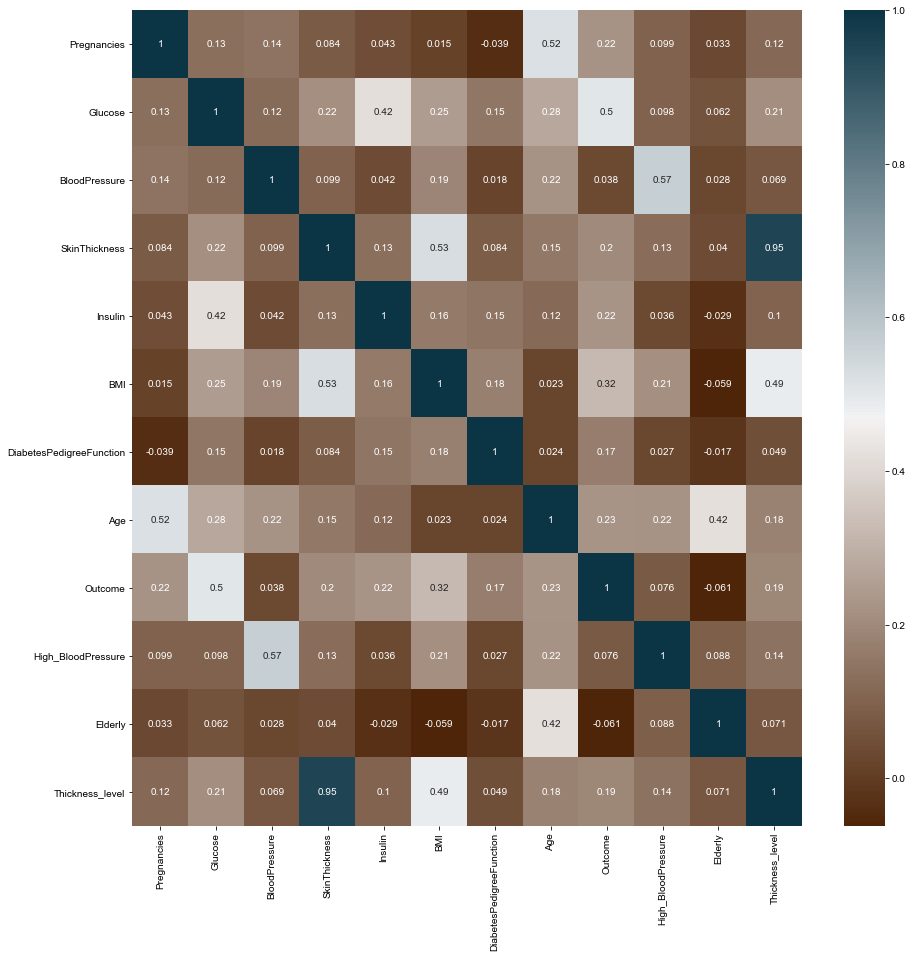

In [5]:
cmap = sns.diverging_palette(30, 230, 90, 20, as_cmap=True)
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),annot=True, cmap=cmap)
sns.set(font_scale=1)

In [6]:
dfDummies = pd.get_dummies(df)
dfDummies

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,High_BloodPressure,Elderly,Thickness_level,Wieght_Healthy,Wieght_Obese,Wieght_UnderWeight,Glucose_Level_high_glucose_levels,Glucose_Level_low_glucose_levels,Glucose_Level_normal_glucose_levels
118,4,97,60,23,125.0,28.2,0.443,22,0,0,0,3,1,0,0,0,0,1
336,0,117,0,32,125.0,33.8,0.932,44,0,0,0,4,0,1,0,0,0,1
374,2,122,52,43,158.0,36.2,0.816,28,0,0,0,5,0,1,0,0,0,1
518,13,76,60,32,125.0,32.8,0.180,41,0,0,0,4,0,1,0,0,0,1
716,3,173,78,39,185.0,33.8,0.970,31,1,0,0,4,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,3,182,74,32,125.0,30.5,0.345,29,1,0,0,4,0,1,0,1,0,0
143,10,108,66,32,125.0,32.4,0.272,42,1,0,0,4,0,1,0,0,0,1
474,4,114,64,32,125.0,28.9,0.126,24,0,0,0,4,1,0,0,0,0,1
318,3,115,66,39,140.0,38.1,0.150,28,0,0,0,4,0,1,0,0,0,1


In [9]:
corr_matrix = dfDummies.corr()
corr_matrix['Outcome'].sort_values(ascending=False)

Outcome                                1.000000
Glucose                                0.502774
Glucose_Level_high_glucose_levels      0.411980
BMI                                    0.320748
Wieght_Obese                           0.283278
Age                                    0.227728
Insulin                                0.224760
Pregnancies                            0.223305
SkinThickness                          0.203656
Thickness_level                        0.193124
DiabetesPedigreeFunction               0.168753
High_BloodPressure                     0.076403
BloodPressure                          0.037597
Wieght_UnderWeight                    -0.059869
Elderly                               -0.061402
Glucose_Level_low_glucose_levels      -0.095130
Wieght_Healthy                        -0.274294
Glucose_Level_normal_glucose_levels   -0.382554
Name: Outcome, dtype: float64